In [1]:
%pip install matplotlib pandas seaborn numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from numpy.typing import NDArray

In [4]:
%pip install alpaca-py

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import plotly.graph_objects as go


def plot_candles_OHLC(data, title):
    """`data` should be an ndarray of shape (days, 4);
    second axis has open, high, low and closing prices resp."""
    fig = go.Figure(data=[go.Candlestick(
        x=list(range(len(data))),
        open=data[:, 0],
        high=data[:, 1],
        low=data[:, 2],
        close=data[:, 3],
    )])

    fig.update_layout(title=title)
    fig.show()

    return fig

In [7]:
from alpaca.data.historical import OptionHistoricalDataClient, StockHistoricalDataClient
from alpaca.data.requests import OptionBarsRequest, StockBarsRequest
from alpaca.data.timeframe import TimeFrame

In [8]:
import dotenv
dotenv.load_dotenv()

True

In [9]:
import os

In [10]:
ALPACA_PAPER_API_KEY = os.getenv("ALPACA_PAPER_API_KEY")
ALPACA_PAPER_SECRET_KEY = os.getenv("ALPACA_PAPER_SECRET_KEY")

if ALPACA_PAPER_API_KEY is None or ALPACA_PAPER_SECRET_KEY is None:
    raise ValueError("API keys not found in environment variables.")

In [11]:
options_client = OptionHistoricalDataClient(ALPACA_PAPER_API_KEY, ALPACA_PAPER_SECRET_KEY)
stocks_client = StockHistoricalDataClient(ALPACA_PAPER_API_KEY, ALPACA_PAPER_SECRET_KEY)

In [12]:
from datetime import datetime, timedelta

## Setting up and research

In [13]:
start_date = datetime(2024, 2, 5)  # Monday
asset = "SPY"  # S&P 500 ETF

### Getting asset prices

In [14]:
asset_prices = stocks_client.get_stock_bars(StockBarsRequest(
    symbol_or_symbols=asset, 
    timeframe=TimeFrame.Day, 
    start=start_date, 
    end=start_date + timedelta(days=7*40)
))

asset_prices

{   'data': {   'SPY': [   {   'close': 492.55,
                               'high': 494.3778,
                               'low': 490.23,
                               'open': 493.695,
                               'symbol': 'SPY',
                               'timestamp': datetime.datetime(2024, 2, 5, 5, 0, tzinfo=TzInfo(UTC)),
                               'trade_count': 537117.0,
                               'volume': 75685102.0,
                               'vwap': 492.614541},
                           {   'close': 493.98,
                               'high': 494.32,
                               'low': 492.05,
                               'open': 493.52,
                               'symbol': 'SPY',
                               'timestamp': datetime.datetime(2024, 2, 6, 5, 0, tzinfo=TzInfo(UTC)),
                               'trade_count': 456773.0,
                               'volume': 55918602.0,
                               'vwap': 493.014563},
 

In [15]:
df_asset = asset_prices.df

df_asset.tail()

open    high       low   close  \
symbol timestamp                                                     
SPY    2024-11-04 05:00:00+00:00  571.18  572.50  567.8900  569.81   
       2024-11-05 05:00:00+00:00  570.74  576.74  570.5200  576.70   
       2024-11-06 05:00:00+00:00  589.20  591.93  585.3900  591.04   
       2024-11-07 05:00:00+00:00  593.08  596.65  592.9999  595.61   
       2024-11-08 05:00:00+00:00  596.17  599.64  596.1650  598.19   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
SPY    2024-11-04 05:00:00+00:00  38216975.0     394247.0  570.278487  
       2024-11-05 05:00:00+00:00  39478322.0     378253.0  575.077202  
       2024-11-06 05:00:00+00:00  68181968.0     666095.0  589.331949  
       2024-11-07 05:00:00+00:00  47233212.0     427536.0  594.921264  
       2024-11-08 05:00:00+00:00  46444893.0     406428.0  597.967927

In [16]:
df_asset.head()

open      high     low   close  \
symbol timestamp                                                      
SPY    2024-02-05 05:00:00+00:00  493.695  494.3778  490.23  492.55   
       2024-02-06 05:00:00+00:00  493.520  494.3200  492.05  493.98   
       2024-02-07 05:00:00+00:00  496.290  498.5300  495.36  498.10   
       2024-02-08 05:00:00+00:00  498.100  498.7100  497.26  498.32   
       2024-02-09 05:00:00+00:00  498.840  501.6500  498.49  501.20   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
SPY    2024-02-05 05:00:00+00:00  75685102.0     537117.0  492.614541  
       2024-02-06 05:00:00+00:00  55918602.0     456773.0  493.014563  
       2024-02-07 05:00:00+00:00  70556506.0     501857.0  497.442779  
       2024-02-08 05:00:00+00:00  52343636.0     406775.0  498.025515  
       2024-02-09 05:00:00+00:00  63979375.0     467171.0  500.320019

In [17]:
df_asset.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 194 entries, ('SPY', Timestamp('2024-02-05 05:00:00+0000', tz='UTC')) to ('SPY', Timestamp('2024-11-08 05:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         194 non-null    float64
 1   high         194 non-null    float64
 2   low          194 non-null    float64
 3   close        194 non-null    float64
 4   volume       194 non-null    float64
 5   trade_count  194 non-null    float64
 6   vwap         194 non-null    float64
dtypes: float64(7)
memory usage: 17.0+ KB


In [18]:
asset_array = df_asset.loc[df_asset.index.get_level_values("symbol") == asset, ["open", "high", "low", "close"]].values
asset_array.shape

(194, 4)

In [19]:
_ = plot_candles_OHLC(asset_array, f"{asset} price")

In [20]:
# just a statistic of the daily SPY price movement (in percentages)

openings = df_asset["open"]
closings = df_asset["close"]
movements = (closings / openings - 1) * 100
movements.describe()

count    194.000000
mean      -0.002933
std        0.594536
min       -2.073263
25%       -0.279138
50%        0.049062
75%        0.387916
max        1.286481
dtype: float64

In [21]:
movements.abs().describe()  # absolute values of daily price movements (in percentages)

count    194.000000
mean       0.445493
std        0.392415
min        0.001968
25%        0.158984
50%        0.358764
75%        0.596172
max        2.073263
dtype: float64

<Axes: >

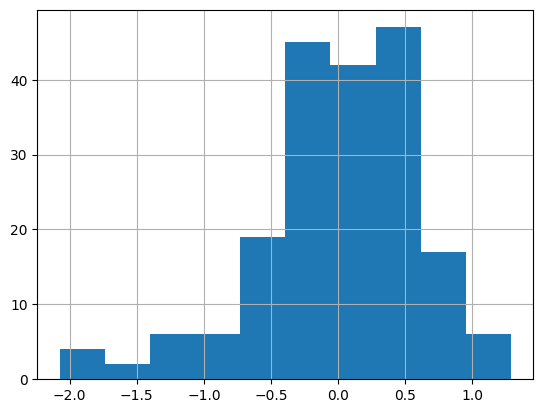

In [22]:
movements.hist()

<Axes: >

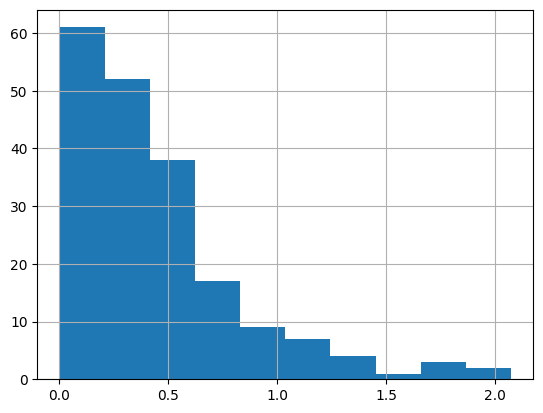

In [23]:
movements.abs().hist()

We can quite safely choose 1.5% as the upper bound that are going to use for the wings of a butterfly/condor

Let's begin by trying a 0DTE iron condor for the first day only (5 Feb 2024)

In [24]:
expirations_intv_days = 0  # 0DTE options

curr_date = start_date
curr_price = df_asset[df_asset.index.get_level_values("timestamp") >= start_date.strftime("%Y-%m-%d")].sort_index().iloc[0]["open"]
curr_price

493.695

In [25]:
wings_spread_ratio = 0.015 # 1.5% of the current price
lower_strike, higher_strike = curr_price * (1 - wings_spread_ratio), curr_price * (1 + wings_spread_ratio)
lower_strike, higher_strike

(486.289575, 501.100425)

In [26]:
from enum import Enum
from dataclasses import dataclass

class OptionType(Enum):
    PUT = "P"
    CALL = "C"


@dataclass
class Option:
    optype: OptionType
    asset_ticker: str
    expiry_date: datetime
    strike_price: float | int

    @property
    def ticker(self) -> str:
        return f"{self.asset_ticker}{self.expiry_date.strftime('%y%m%d')}{self.optype.value}{int(self.strike_price*1000):08}"
    
    def __str__(self) -> str:
        return self.ticker
    

Option(OptionType.PUT, asset, curr_date + timedelta(days=expirations_intv_days), 123).ticker

'SPY240205P00123000'

In [27]:
expiry_date = curr_date + timedelta(days=expirations_intv_days)

high, low, middle = round(higher_strike), round(lower_strike), round(curr_price)

iron_condor_longs = [
    Option(OptionType.CALL, asset, expiry_date, high),
    Option(OptionType.PUT, asset, expiry_date, low),
]

iron_condor_shorts = [
    Option(OptionType.CALL, asset, expiry_date, middle),
    Option(OptionType.PUT, asset, expiry_date, middle),
]

tickers = [opt.ticker for opt in iron_condor_longs + iron_condor_shorts]
tickers

['SPY240205C00501000',
 'SPY240205P00486000',
 'SPY240205C00494000',
 'SPY240205P00494000']

In [28]:
full_day_opts = options_client.get_option_bars(OptionBarsRequest(
    symbol_or_symbols=tickers,
    timeframe=TimeFrame.Minute,  # type: ignore
    start=curr_date,
))
full_day_opts_df = full_day_opts.df  # type: ignore
full_day_opts_df

open  high   low  close  volume  \
symbol             timestamp                                                    
SPY240205C00494000 2024-02-05 14:30:00+00:00  0.92  0.94  0.71   0.73  2736.0   
                   2024-02-05 14:31:00+00:00  0.74  0.76  0.62   0.67  3238.0   
                   2024-02-05 14:32:00+00:00  0.67  0.69  0.62   0.64  3232.0   
                   2024-02-05 14:33:00+00:00  0.64  0.75  0.64   0.74  2547.0   
                   2024-02-05 14:34:00+00:00  0.75  0.80  0.73   0.77  5767.0   
...                                            ...   ...   ...    ...     ...   
SPY240205P00494000 2024-02-05 21:09:00+00:00  1.50  1.51  1.45   1.45    11.0   
                   2024-02-05 21:11:00+00:00  1.54  1.54  1.54   1.54     5.0   
                   2024-02-05 21:12:00+00:00  1.55  1.55  1.55   1.55     2.0   
                   2024-02-05 21:13:00+00:00  1.65  1.65  1.36   1.36    60.0   
                   2024-02-05 21:14:00+00:00  1.58  1.58  1.58   1.58     1.0   

                                              trade_count      vwap  
symbol             timestamp                                         
SPY240205C00494000 2024-02-05 14:30:00+00:00        452.0  0.818531  
                   2024-02-05 14:31:00+00:00        378.0  0.682817  
                   2024-02-05 14:32:00+00:00        435.0  0.658153  
                   2024-02-05 14:33:00+00:00        333.0  0.684817  
                   2024-02-05 14:34:00+00:00        491.0  0.766820  
...                                                   ...       ...  
SPY240205P00494000 2024-02-05 21:09:00+00:00          4.0  1.480909  
                   2024-02-05 21:11:00+00:00          3.0  1.540000  
                   2024-02-05 21:12:00+00:00          1.0  1.550000  
                   2024-02-05 21:13:00+00:00          4.0  1.577667  
                   2024-02-05 21:14:00+00:00          1.0  1.580000  

[1035 rows x 7 columns]

In [29]:
full_day_opts_df.groupby("timestamp").count()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2024-02-05 14:30:00+00:00,3,3,3,3,3,3,3
2024-02-05 14:31:00+00:00,3,3,3,3,3,3,3
2024-02-05 14:32:00+00:00,3,3,3,3,3,3,3
2024-02-05 14:33:00+00:00,3,3,3,3,3,3,3
2024-02-05 14:34:00+00:00,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...
2024-02-05 21:10:00+00:00,1,1,1,1,1,1,1
2024-02-05 21:11:00+00:00,1,1,1,1,1,1,1
2024-02-05 21:12:00+00:00,2,2,2,2,2,2,2


In [43]:
# there are missing entries for some symbols and timestamps, we will have to artificially fill with $0.01 prices and volumes of 0

full_day_opts_nomissing_df = full_day_opts_df\
    .reindex(pd.MultiIndex.from_product([
        tickers, 
        full_day_opts_df.index.get_level_values("timestamp").unique()
    ], names=["symbol", "timestamp"]))\
    
full_day_opts_nomissing_df[["volume", "vwap", "trade_count"]] = full_day_opts_nomissing_df[["volume", "vwap", "trade_count"]].fillna(0)
full_day_opts_nomissing_df = full_day_opts_nomissing_df.fillna(method='ffill')  # interpolate missing prices with latest known
full_day_opts_nomissing_df = full_day_opts_nomissing_df.fillna(0.01)  # if still no info for the whole period of some ticker
full_day_opts_nomissing_df

C:\Users\Owner\AppData\Local\Temp\ipykernel_10684\3767755696.py:10: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



open  high   low  close  volume  \
symbol             timestamp                                                    
SPY240205C00501000 2024-02-05 14:30:00+00:00  0.01  0.01  0.01   0.01     0.0   
                   2024-02-05 14:31:00+00:00  0.01  0.01  0.01   0.01     0.0   
                   2024-02-05 14:32:00+00:00  0.01  0.01  0.01   0.01     0.0   
                   2024-02-05 14:33:00+00:00  0.01  0.01  0.01   0.01     0.0   
                   2024-02-05 14:34:00+00:00  0.01  0.01  0.01   0.01     0.0   
...                                            ...   ...   ...    ...     ...   
SPY240205P00494000 2024-02-05 21:14:00+00:00  1.58  1.58  1.58   1.58     1.0   
                   2024-02-05 21:04:00+00:00  1.70  1.73  1.60   1.60   235.0   
                   2024-02-05 21:07:00+00:00  1.42  1.50  1.42   1.50     3.0   
                   2024-02-05 21:11:00+00:00  1.54  1.54  1.54   1.54     5.0   
                   2024-02-05 21:13:00+00:00  1.65  1.65  1.36   1.36    60.0   

                                              trade_count      vwap  
symbol             timestamp                                         
SPY240205C00501000 2024-02-05 14:30:00+00:00          0.0  0.000000  
                   2024-02-05 14:31:00+00:00          0.0  0.000000  
                   2024-02-05 14:32:00+00:00          0.0  0.000000  
                   2024-02-05 14:33:00+00:00          0.0  0.000000  
                   2024-02-05 14:34:00+00:00          0.0  0.000000  
...                                                   ...       ...  
SPY240205P00494000 2024-02-05 21:14:00+00:00          1.0  1.580000  
                   2024-02-05 21:04:00+00:00         11.0  1.607319  
                   2024-02-05 21:07:00+00:00          2.0  1.473333  
                   2024-02-05 21:11:00+00:00          3.0  1.540000  
                   2024-02-05 21:13:00+00:00          4.0  1.577667  

[1620 rows x 7 columns]

In [44]:
for ticker in tickers:
    _ = plot_candles_OHLC(full_day_opts_nomissing_df.loc[full_day_opts_nomissing_df.index.get_level_values("symbol") == ticker, ["open", "high", "low", "close"]].values, ticker)

Initial value:  212.0


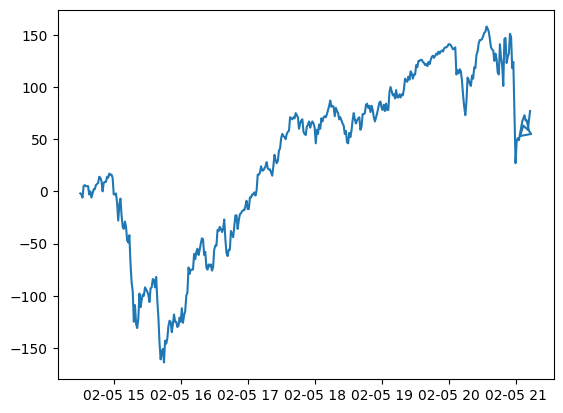

In [45]:
# # observe position value during the course of the day

timestamps = full_day_opts_nomissing_df.index.get_level_values("timestamp").unique()

def contracts_value(
    longs: list[Option], 
    shorts: list[Option], 
    df: pd.DataFrame, 
    timestamp: datetime,
    is_end_of_timestamp: bool = True,
) -> float:
    candle_part = "close" if is_end_of_timestamp else "open"
    curr_value = 0
    for opt in longs:
        curr_value += df.loc[(opt.ticker, timestamp), candle_part] * 100  # 100 options per contract
    for opt in shorts:
        curr_value -= df.loc[(opt.ticker, timestamp), candle_part] * 100  # 100 options per contract
    return float(curr_value)

# initiate positions on open
inital_premium = -contracts_value(iron_condor_longs, iron_condor_shorts, full_day_opts_nomissing_df, timestamps[0], is_end_of_timestamp=False)
# minus sign because we are selling shorts and buyng longs, 
# but the above function calculates the reverse (our money after selling longs and buying shorts, i.e. after closing positions)
print("Initial value: ", inital_premium)

values = np.array([contracts_value(iron_condor_longs, iron_condor_shorts, full_day_opts_nomissing_df, timestamp) for timestamp in timestamps])

total_values = values + inital_premium

plt.plot(timestamps, total_values)

That's nice, but how to determine when to close the positions?

### Backtesting teh strategies

In [46]:
# make a convenience function that returns the value of the positions for each timestamp during a given day

def positions_value_during_day(
    longs: list[Option], 
    shorts: list[Option], 
    df_day_no_missing_values: pd.DataFrame, 
) -> NDArray:
    timestamps = df_day_no_missing_values.index.get_level_values("timestamp").unique()
    inital_premium = -contracts_value(longs, shorts, df_day_no_missing_values, timestamps[0], is_end_of_timestamp=False)
    values = np.array([contracts_value(longs, shorts, df_day_no_missing_values, timestamp) for timestamp in timestamps])
    return values + inital_premium

In [47]:
def fetch_full_day_options_data(
    day: datetime,
    longs: list[Option], 
    shorts: list[Option], 
) -> pd.DataFrame:
    tickers = [opt.ticker for opt in longs + shorts]
    full_day_opts_df = options_client.get_option_bars(OptionBarsRequest(
        symbol_or_symbols=tickers,
        timeframe=TimeFrame.Minute,  # type: ignore
        start=day,
    )).df  # type: ignore
    full_day_opts_nomissing_df = full_day_opts_df\
        .reindex(pd.MultiIndex.from_product([
            tickers, 
            full_day_opts_df.index.get_level_values("timestamp").unique()
        ], names=["symbol", "timestamp"]))
    full_day_opts_nomissing_df[["volume", "vwap"]] = full_day_opts_nomissing_df[["volume", "vwap"]].fillna(0)
    full_day_opts_nomissing_df = full_day_opts_nomissing_df.fillna(method='ffill')  # interpolate missing prices with latest known
    full_day_opts_nomissing_df = full_day_opts_nomissing_df.fillna(0.01)  # if still no info for the whole period of some ticker
    return full_day_opts_nomissing_df

In [48]:
def pick_iron_condor_options(
    day: datetime,
    asset_ticker: str,
    df_assets: pd.DataFrame,
    *,
    dte: int,
    wingspan_ratio: float,
) -> tuple[list[Option], list[Option]]:
    """Return two lists of options: first longs, then shorts."""
    df_asset = df_assets.loc[df_assets.index.get_level_values("symbol") == asset_ticker]

    curr_price = df_asset[df_asset.index.get_level_values("timestamp") >= day.strftime("%Y-%m-%d")].sort_index().iloc[0]["open"]
    lower_strike, higher_strike = curr_price * (1 - wingspan_ratio), curr_price * (1 + wingspan_ratio)
    high, low, middle = round(higher_strike), round(lower_strike), round(curr_price)

    expiry_date = day + timedelta(days=dte)
    iron_condor_longs = [
        Option(OptionType.CALL, asset_ticker, expiry_date, high),
        Option(OptionType.PUT, asset_ticker, expiry_date, low),
    ]
    iron_condor_shorts = [
        Option(OptionType.CALL, asset_ticker, expiry_date, middle),
        Option(OptionType.PUT, asset_ticker, expiry_date, middle),
    ]
    return iron_condor_longs, iron_condor_shorts


In [49]:
from typing import Callable
from tqdm import tqdm

def do_simulation(
    starting_money: float,
    n_contracts: int,
    df_asset: pd.DataFrame,
    dte: int,
    wingspan_ratio: float,
    closing_strategy: Callable[[NDArray], float],
) -> pd.DataFrame:
    """Perform a simulation of the given strategy.
    Return the value of the portfolio at the end of each day."""

    money = starting_money
    results = []

    for timestamp in tqdm(df_asset.index.get_level_values("timestamp").unique()):
        day = timestamp.to_pydatetime()
        longs, shorts = pick_iron_condor_options(day, asset, df_asset, dte=dte, wingspan_ratio=wingspan_ratio)
        df_day = fetch_full_day_options_data(day, longs, shorts)
        values = positions_value_during_day(longs, shorts, df_day)
        closing_value = closing_strategy(values)
        money += closing_value * n_contracts
        results.append(money)
    
    return pd.DataFrame(results, index=df_asset.index.get_level_values("timestamp").unique(), columns=["value"])

In [50]:
def closing_strategy_last(values: NDArray) -> float:
    return values[-1]

def closing_strategy_max(values: NDArray) -> float:
    return values.max()

def closing_strategy_middle(values: NDArray) -> float:
    return values[len(values) // 2]

def closing_strategy_limit(limit_value: float) -> Callable[[NDArray], float]:
    def strategy(values: NDArray) -> float:
        for value in values:
            if value >= limit_value:
                return value
        return values[-1]
    return strategy

def closing_strategy_limit_stoploss(limit_value: float, stoploss_value: float) -> Callable[[NDArray], float]:
    def strategy(values: NDArray) -> float:
        for value in values:
            if value >= limit_value:
                return value
            if value <= stoploss_value:
                return value
        return values[-1]
    return strategy

def closing_strategy_last15(values: NDArray) -> float:
    return values[-15]


In [51]:
df_asset.info()  # just a sanity check that after everything above it is still here and okay

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 194 entries, ('SPY', Timestamp('2024-02-05 05:00:00+0000', tz='UTC')) to ('SPY', Timestamp('2024-11-08 05:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         194 non-null    float64
 1   high         194 non-null    float64
 2   low          194 non-null    float64
 3   close        194 non-null    float64
 4   volume       194 non-null    float64
 5   trade_count  194 non-null    float64
 6   vwap         194 non-null    float64
dtypes: float64(7)
memory usage: 17.0+ KB


In [56]:
# df_period = df_asset[df_asset.index.get_level_values("timestamp") >= start_day.strftime("%Y-%m-%d")]

portfolio_df = do_simulation(
    starting_money=0,
    n_contracts=5,
    df_asset=df_asset,
    dte=0,
    wingspan_ratio=0.015,
    closing_strategy=closing_strategy_limit(750),
)

  0%|          | 0/194 [00:00<?, ?it/s]C:\Users\Owner\AppData\Local\Temp\ipykernel_10684\2861601434.py:18: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

  1%|          | 1/194 [00:01<04:51,  1.51s/it]C:\Users\Owner\AppData\Local\Temp\ipykernel_10684\2861601434.py:18: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

  1%|          | 2/194 [00:02<03:07,  1.02it/s]C:\Users\Owner\AppData\Local\Temp\ipykernel_10684\2861601434.py:18: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

  2%|▏         | 3/194 [00:02<02:37,  1.21it/s]C:\Users\Owner\AppData\Local\Temp\ipykernel_10684\2861601434.py:18: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instea

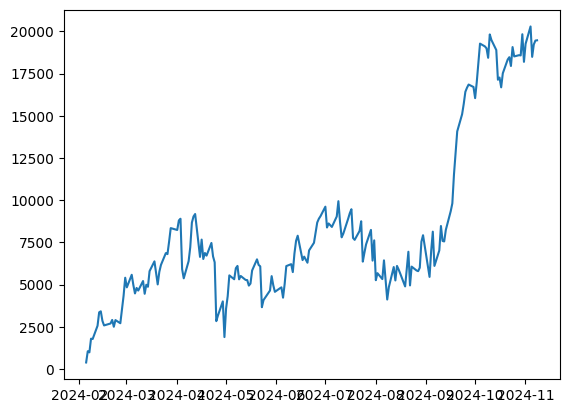

In [57]:
plt.plot(portfolio_df)